# 고객의 소비등급별 인사이트 발굴

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df_notnull_newcols = pd.read_csv('./new_retail_data_notnull_newcols.csv')
df_notnull_newcols[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Age_Group(연령대),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Hour(시),Time_Group(시간대),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,20대,Male,Low,Regular,9/18/2023,2023,September,22:03:55,22,오후,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,10대,Female,Low,Premium,12/31/2023,2023,December,8:42:04,8,오전,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,40대,Male,Low,Regular,4/26/2023,2023,April,4:06:29,4,오전,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [5]:
df_notnull_newcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293908 entries, 0 to 293907
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction_ID(구매번호)    293908 non-null  int64  
 1   Customer_ID(고객번호)       293908 non-null  int64  
 2   City(시)                 293908 non-null  object 
 3   State(주)                293908 non-null  object 
 4   Country(국가)             293908 non-null  object 
 5   Age(나이)                 293908 non-null  int64  
 6   Age_Group(연령대)          293908 non-null  object 
 7   Gender(성별)              293908 non-null  object 
 8   Income(소득수준)            293908 non-null  object 
 9   Customer_Segment(소비등급)  293908 non-null  object 
 10  Date(구매날짜)              293908 non-null  object 
 11  Year(연도)                293908 non-null  int64  
 12  Month(월)                293908 non-null  object 
 13  Time(시간)                293908 non-null  object 
 14  Hour(시)             

## Montn(월) 컬럼 재 생성

잘못 표기된 Month 컬럼이 있어 해당 컬럼을 지우고, Date(구매날짜) 컬럼을 기준으로 Month(월) 컬럼 재생성

In [6]:
df_notnull_newcols.drop(columns='Month(월)', inplace=True)
df_notnull_newcols[:1]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Age_Group(연령대),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Time(시간),Hour(시),Time_Group(시간대),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,20대,Male,Low,Regular,9/18/2023,2023,22:03:55,22,오후,3.0,108.028757,324.08627,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts


In [7]:
month = {
    '1': 'January', '2': 'February', '3': 'March', '4': 'April',
    '5': 'May', '6': 'June', '7': 'July', '8': 'August',
    '9': 'September', '10': 'October', '11': 'November', '12': 'December'
}

df_notnull_newcols['Month(월)'] = df_notnull_newcols['Date(구매날짜)'].apply(lambda x: month[x.split('/')[0]])
month = df_notnull_newcols.pop('Month(월)')
df_notnull_newcols.insert(12, 'Month(월)', month)
df_notnull_newcols[:3]

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Age_Group(연령대),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Hour(시),Time_Group(시간대),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,20대,Male,Low,Regular,9/18/2023,2023,September,22:03:55,22,오후,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,10대,Female,Low,Premium,12/31/2023,2023,December,8:42:04,8,오전,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,40대,Male,Low,Regular,4/26/2023,2023,April,4:06:29,4,오전,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [8]:
# 새 컬럼 생성 결과 확인
df_notnull_newcols.groupby('Month(월)')[['Transaction_ID(구매번호)']].count().sort_values(by='Transaction_ID(구매번호)', ascending=False)

,Transaction_ID(구매번호)
Month(월),
January,24982
March,24939
October,24925
July,24873
August,24860
December,24715
May,24600
September,24221
June,24169


In [9]:
df_2023 = df_notnull_newcols[df_notnull_newcols['Year(연도)'] == 2023].reset_index().iloc[:,1:]
df_2023.groupby('Month(월)')[['Transaction_ID(구매번호)']].count().sort_values(by='Transaction_ID(구매번호)', ascending=False)

,Transaction_ID(구매번호)
Month(월),
March,24939
October,24925
July,24873
August,24860
December,24715
May,24600
September,24221
June,24169
April,24070


In [10]:
df_2024 = df_notnull_newcols[df_notnull_newcols['Year(연도)'] == 2024].reset_index().iloc[:,1:]
df_2024.groupby('Month(월)')[['Transaction_ID(구매번호)']].count().sort_values(by='Transaction_ID(구매번호)', ascending=False)

,Transaction_ID(구매번호)
Month(월),
January,24982
February,23550


In [13]:
# 변경사항을 데이터 프레임으로 저장
df_notnull_newcols.to_csv('./new_retail_data_notnull_newcols.csv', index=False)

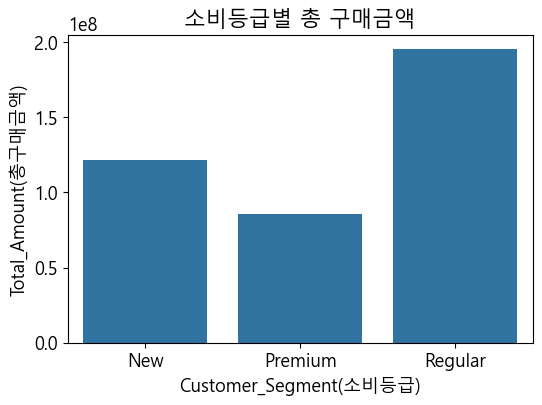

In [64]:
# 소비등급 별 매출
a = df_notnull_newcols.groupby(['Customer_Segment(소비등급)'])[['Total_Amount(총구매금액)']].sum().reset_index()

plt.figure(figsize=(6, 4))
plt.title('소비등급별 총 구매금액')
sns.barplot(data=a, x='Customer_Segment(소비등급)', y='Total_Amount(총구매금액)')
plt.show()

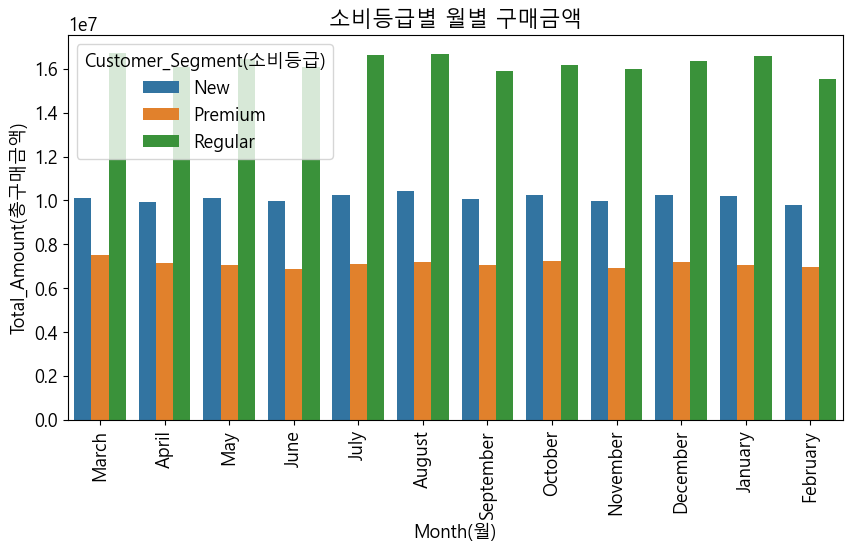

In [50]:
# 23.03 ~ 24.02 기간 동안 소비등급별 월별 매출 변화
df_month = df_notnull_newcols.groupby(['Customer_Segment(소비등급)', 'Month(월)'])[['Total_Amount(총구매금액)']].sum().reset_index()

month_order = ['March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December', 'January', 'February']
    
plt.figure(figsize=(10,5))
plt.rc('font', size=13)
sns.barplot(data=df_month, x='Month(월)', y='Total_Amount(총구매금액)', order=month_order, hue='Customer_Segment(소비등급)')
plt.title(f'소비등급별 월별 구매금액')
plt.xticks(rotation=90)
plt.show()

## 소비등급별 매출 분석 모듈화

In [14]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 비율
def ratings_feedback_gender(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    fig, axs = plt.subplots(figsize=(30,10), ncols = 3, nrows=1)
    plt.rc('font', size=20)

    lst = ['Ratings(평점)', 'Feedback(피드백)', 'Gender(성별)']
    for i, l in enumerate(lst):
        dt = df.groupby([l])[['Total_Amount(총구매금액)']].count().reset_index()
        dt.rename(columns={'Total_Amount(총구매금액)' : 'count'}, inplace=True)

        axs[i].set_title(f'소비등급 {segment} 고객들의 {l}')
        axs[i].pie(data=dt, x='count', labels=l, autopct='%.1f%%')

    plt.show()

In [15]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 구매금액
def ratings_feedback_gender_sales(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    plt.figure(figsize=(30,10))
    plt.rc('font', size=20)

    lst = ['Ratings(평점)', 'Feedback(피드백)', 'Gender(성별)']
    for i, ll in enumerate(lst):
        dt = df.groupby([ll])[['Total_Amount(총구매금액)']].sum().reset_index()

        plt.subplot(1, 3, i+1)
        plt.tight_layout()
        plt.title(f'소비등급 {segment} 고객들의 {ll} 구매금액')

        sns.barplot(data=dt, x=ll, y='Total_Amount(총구매금액)', hue=ll)

    plt.show()

In [16]:
# 소비등급에 따른 고객들의 나이대별, 성별 총 구매금액
def age_gender_sales(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    dt = df.groupby(['Gender(성별)', 'Age_Group(연령대)'])[['Total_Amount(총구매금액)']].sum().reset_index()
    plt.rc('font', size=10)
    plt.title(f'소비등급 {segment} 고객들의 성별, 연령대별 구매금액')
    sns.barplot(data=dt, x='Age_Group(연령대)', y='Total_Amount(총구매금액)', hue='Gender(성별)', palette=['skyblue', 'yellowgreen'])
    plt.show()

In [17]:
# 소비등급에 따른 사람들의 국가별, 주별 매출비교
def country_state_sales(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    dt1 = df.groupby('Country(국가)')[['Total_Amount(총구매금액)']].sum().reset_index()
    dt2 = df.groupby(['Country(국가)', 'State(주)'])[['Total_Amount(총구매금액)']].sum().reset_index()
    contries = ['Australia', 'Canada', 'Germany', 'UK', 'USA']

    fig, axs = plt.subplots(figsize=(30,15), ncols = 3, nrows=2)
    plt.rc('font', size=13)
    axs[0,0].set_title(f'소비등급 {segment} 고객들의 국가별 구매금액')
    axs[0,0].pie(data=dt1, x='Total_Amount(총구매금액)', labels='Country(국가)', autopct='%.1f%%')

    for i, contry in enumerate(contries):
        row = int((i+1)/3)
        col = (i+1)%3
        dt3 = dt2[dt2['Country(국가)'] == contry]
        axs[row,col].set_title(f'{contry} 고객들의 주 별 구매금액')
        axs[row,col].pie(data=dt3, x='Total_Amount(총구매금액)', labels='State(주)', autopct='%.1f%%')

    plt.show()

In [18]:
# 국가에 속한 주 별 고객 수
def country_state_customer(dataframe, segment, country):
    import plotly.express as px

    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]
    dt = df[df['Country(국가)'] == country].groupby('State(주)')[['Customer_ID(고객번호)']].count().reset_index()
    dt.rename(columns={'Customer_ID(고객번호)' : 'count'}, inplace=True)

    fig = px.scatter(data_frame=dt, x='State(주)', y='count', color='State(주)', size='count', size_max=50)
    fig.update_layout(title=f'{country}의 State 별 고객 수')
    fig.show()

In [19]:
# 국가에 속한 주 별 고객들의 구매금액
def country_state_customer_sales(dataframe, segment, country):
    import plotly.express as px

    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]
    dt = df[df['Country(국가)'] == country].groupby('State(주)')[['Total_Amount(총구매금액)']].sum().reset_index()
    
    fig = px.scatter(data_frame=dt, x='State(주)', y='Total_Amount(총구매금액)',
                    color='State(주)', size='Total_Amount(총구매금액)', size_max=50)
    fig.update_layout(title=f'{country}의 State 별 고객들의 구매금액')
    fig.show()

In [20]:
# 상품 카테고리별, 브랜드별 매출 비교
def product_category_brand_sales(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    pc = df.groupby('Product_Category(카테고리)')[['Total_Amount(총구매금액)']].sum().reset_index()
    pb = df.groupby('Product_Brand(브랜드)')[['Total_Amount(총구매금액)']].sum().reset_index()

    fig, axs = plt.subplots(figsize=(30,10), ncols = 2, nrows=1)
    plt.rc('font', size=20)
    axs[0].set_title(f'소비등급 {segment} 고객들의 상품 카테고리별 구매금액')
    axs[0].pie(data=pc, x='Total_Amount(총구매금액)', labels='Product_Category(카테고리)', autopct='%.1f%%')

    axs[1].set_title(f'소비등급 {segment} 고객들의 브랜드별 구매금액')
    axs[1].barh(data=pb, y='Product_Brand(브랜드)', width='Total_Amount(총구매금액)')

    plt.show()

In [60]:
# 월별, 시간대별 매출 비교
def month_time_sales(dataframe, segment):
    df = dataframe[dataframe['Customer_Segment(소비등급)'] == segment].reset_index().iloc[:, 1:]

    dt = df.groupby(['Month(월)', 'Time_Group(시간대)'])[['Total_Amount(총구매금액)']].sum().reset_index()
    month_order = ['March', 'April', 'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December', 'January', 'February']
    
    plt.figure(figsize=(10,5))
    plt.rc('font', size=13)
    sns.barplot(data=dt, x='Month(월)', y='Total_Amount(총구매금액)', order=month_order, hue='Time_Group(시간대)')
    plt.title(f'소비등급 {segment} 고객들의 월 시간대별 구매금액')
    plt.xticks(rotation=90)
    plt.show()

### 1. Premium 등급 고객들의 매출 분석

In [22]:
df_origin = pd.read_csv('./new_retail_data_notnull_newcols.csv')
df_origin

,Transaction_ID(구매번호),Customer_ID(고객번호),City(시),State(주),Country(국가),Age(나이),Age_Group(연령대),Gender(성별),Income(소득수준),Customer_Segment(소비등급),Date(구매날짜),Year(연도),Month(월),Time(시간),Hour(시),Time_Group(시간대),Total_Purchases(총구매수),Amount(금액),Total_Amount(총구매금액),Product_Category(카테고리),Product_Brand(브랜드),Product_Type(상품유형),Feedback(피드백),Shipping_Method(배송방법),Payment_Method(결제방법),Order_Status(주문상태),Ratings(평점),products(상품명)
0,8691788,37249,Dortmund,Berlin,Germany,21,20대,Male,Low,Regular,9/18/2023,2023,September,22:03:55,22,오후,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Nottingham,England,UK,19,10대,Female,Low,Premium,12/31/2023,2023,December,8:42:04,8,오전,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Geelong,New South Wales,Australia,48,40대,Male,Low,Regular,4/26/2023,2023,April,4:06:29,4,오전,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460,62101,Edmonton,Ontario,Canada,56,50대,Male,High,Premium,5/8/2023,2023,May,14:55:17,14,오후,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775,27901,Bristol,England,UK,22,20대,Male,Low,Premium,1/10/2024,2024,January,16:54:07,16,오후,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293903,4246475,12104,Townsville,New South Wales,Australia,31,30대,Male,Medium,Regular,1/20/2024,2024,January,23:40:29,23,오후,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
293904,1197603,69772,Hanover,Berlin,Germany,35,30대,Female,Low,New,12/28/2023,2023,December,2:55:45,2,오전,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
293905,7743242,28449,Brighton,England,UK,41,40대,Male,Low,Premium,2/27/2024,2024,February,2:43:49,2,오전,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
293906,9301950,45477,Halifax,Ontario,Canada,41,40대,Male,Medium,New,9/3/2023,2023,September,11:20:31,11,오전,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


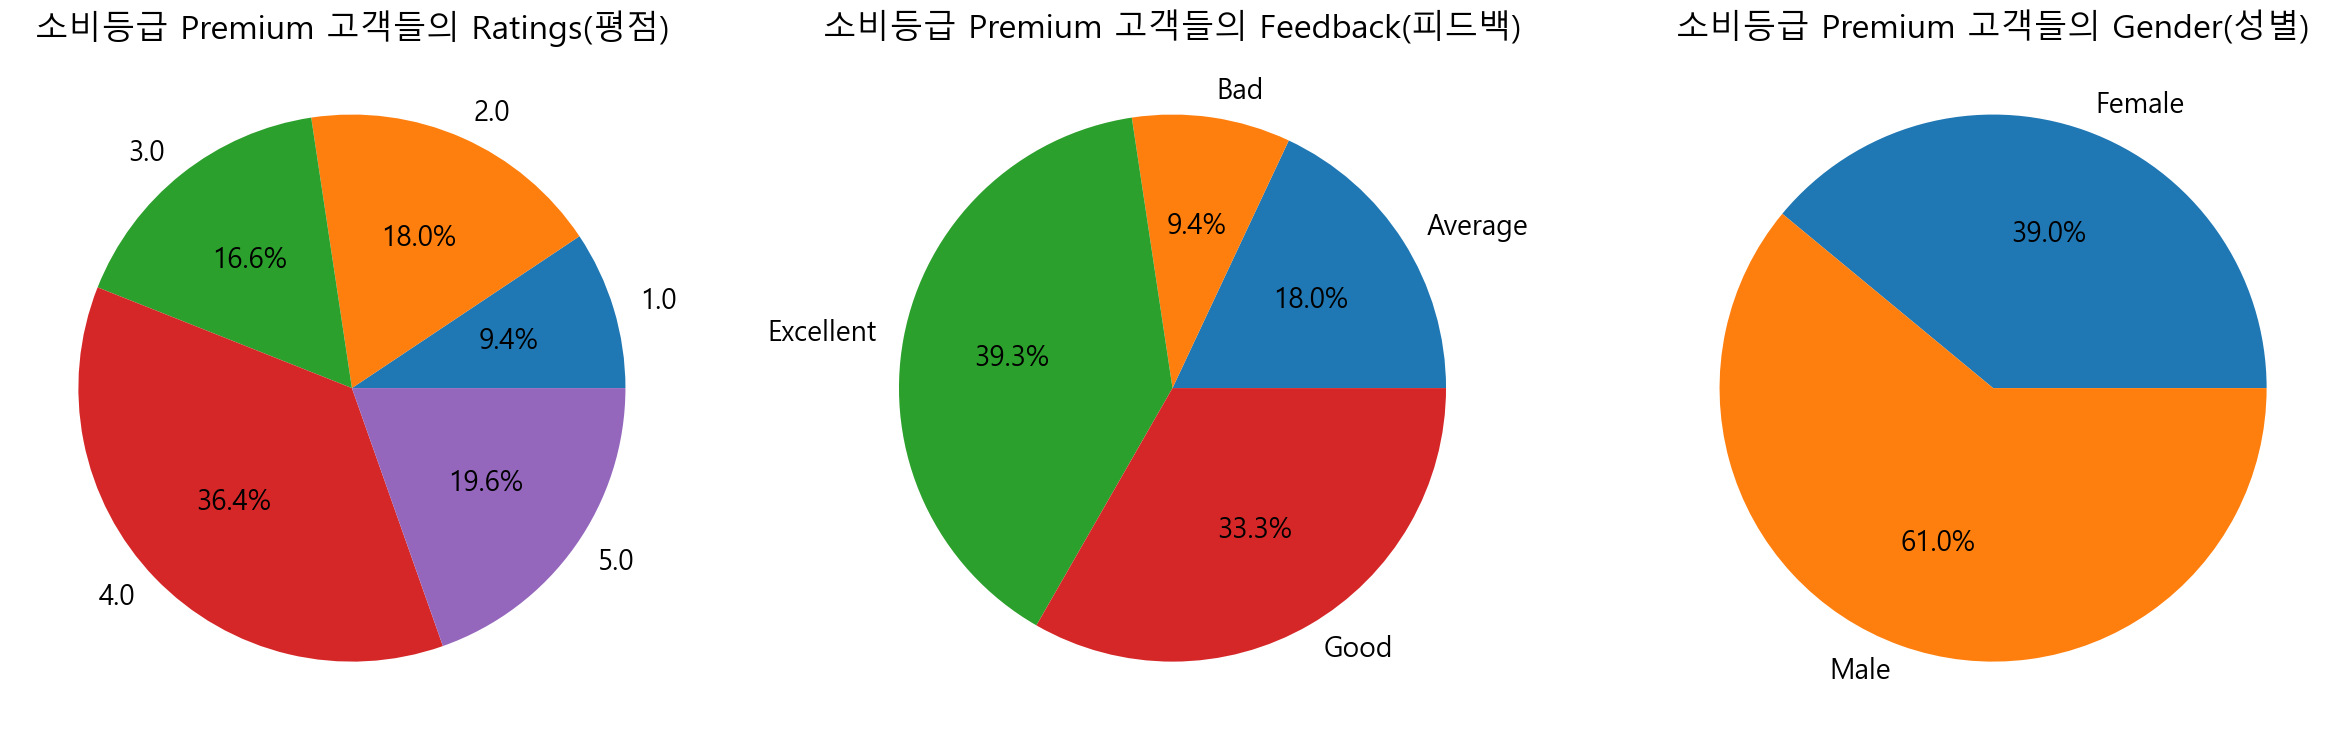

In [23]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 비율
ratings_feedback_gender(df_origin, 'Premium')

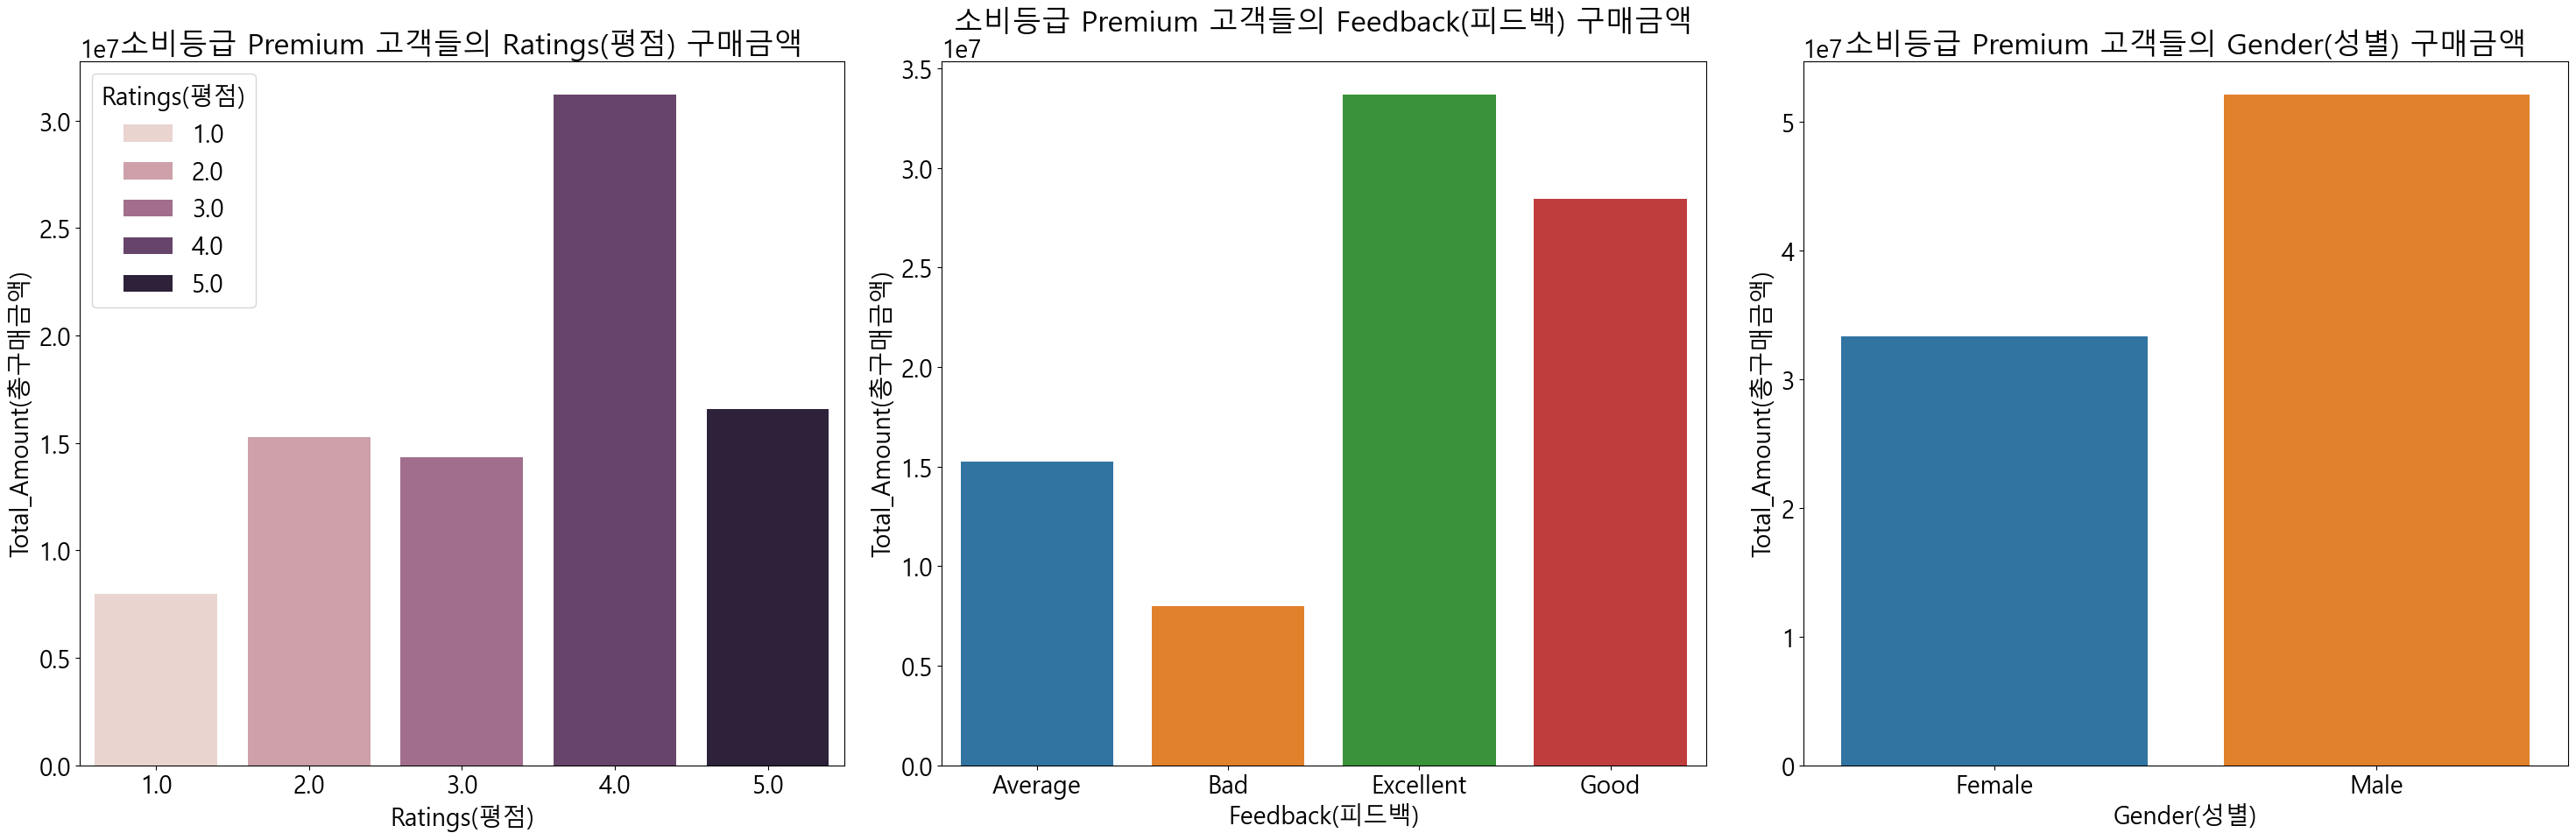

In [24]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 구매금액
ratings_feedback_gender_sales(df_origin, 'Premium')

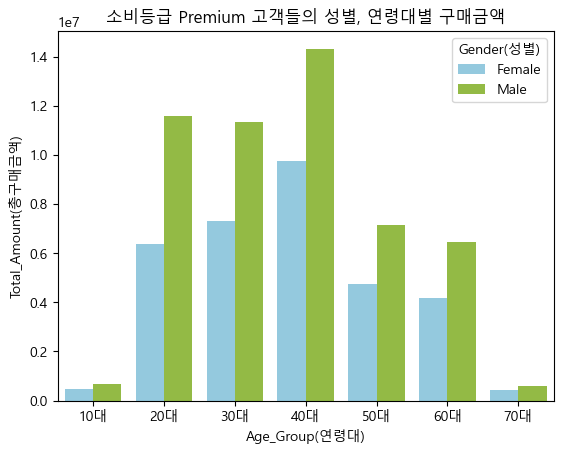

In [25]:
# 소비등급에 따른 고객들의 나이대별, 성별 총 구매금액
age_gender_sales(df_origin, 'Premium')

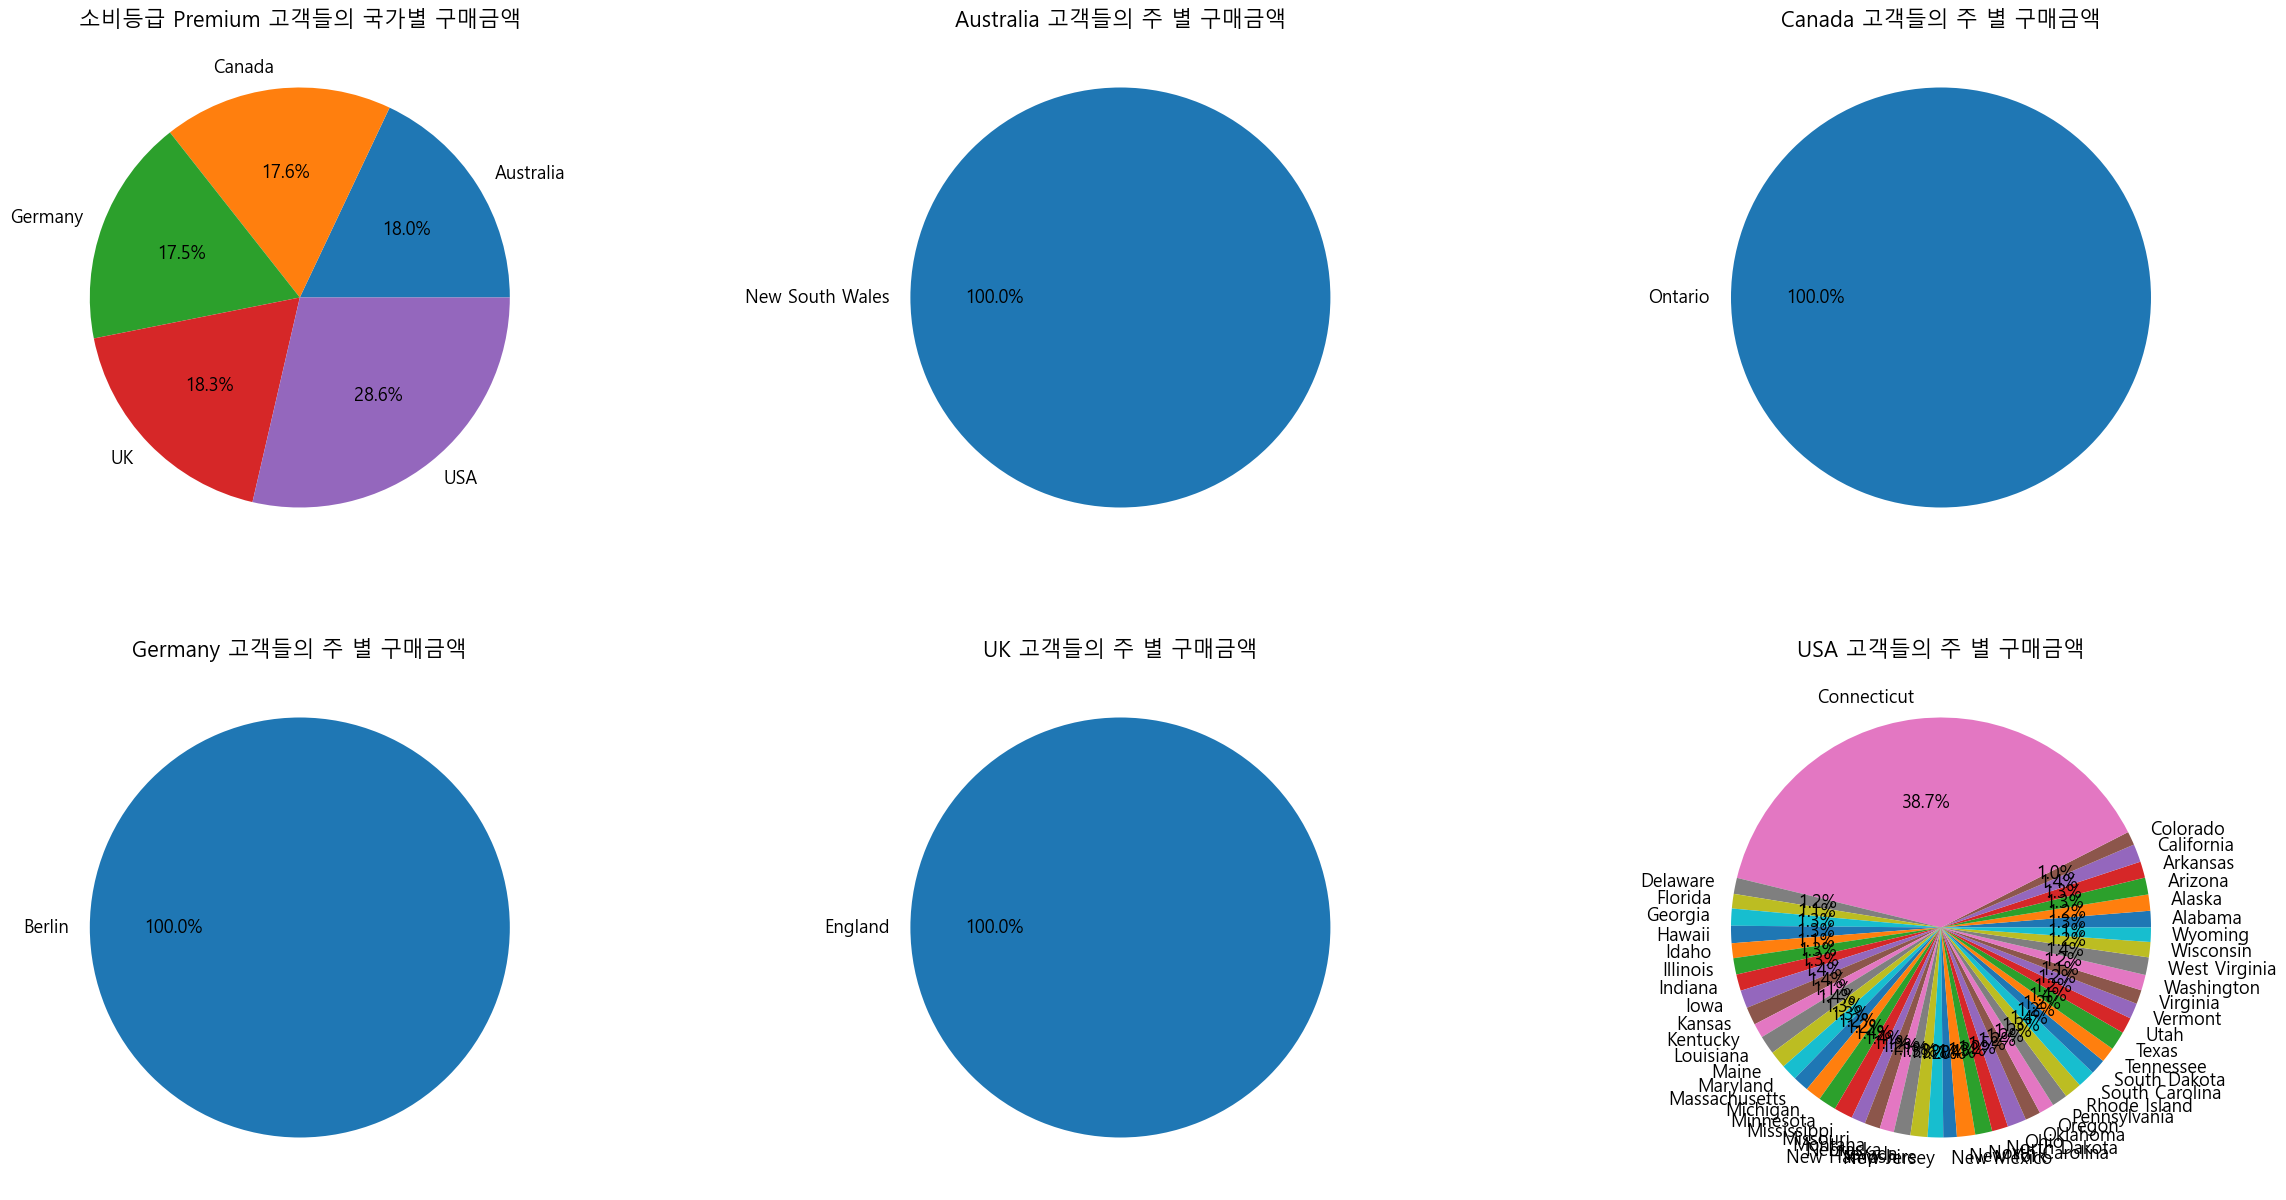

In [26]:
# 소비등급에 따른 사람들의 국가별, 주별 매출비교
country_state_sales(df_origin, 'Premium')

In [27]:
# 국가에 속한 주 별 고객 수
country_state_customer(df_origin, 'Premium', 'USA')

In [28]:
# 국가에 속한 주 별 고객들의 구매금액
country_state_customer_sales(df_origin, 'Premium', 'USA')

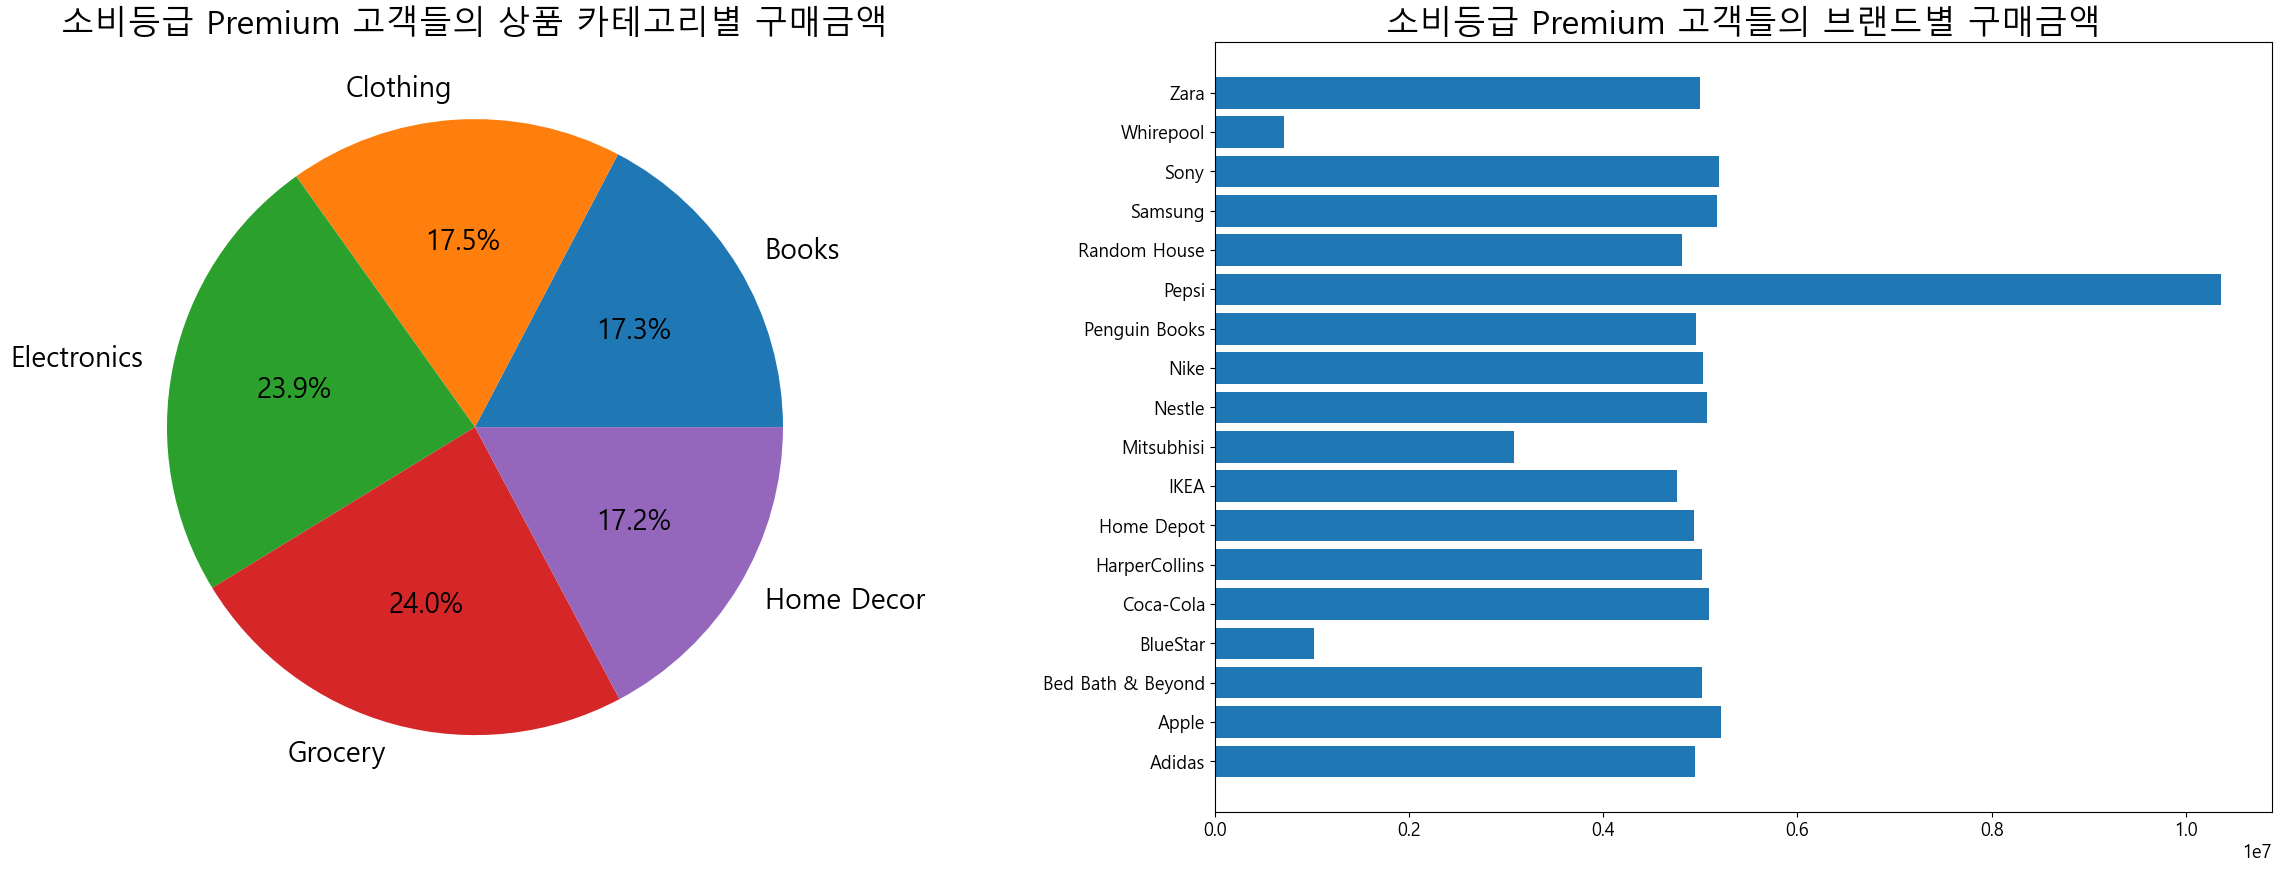

In [29]:
# 상품 카테고리별, 브랜드별 매출 비교
product_category_brand_sales(df_origin, 'Premium')

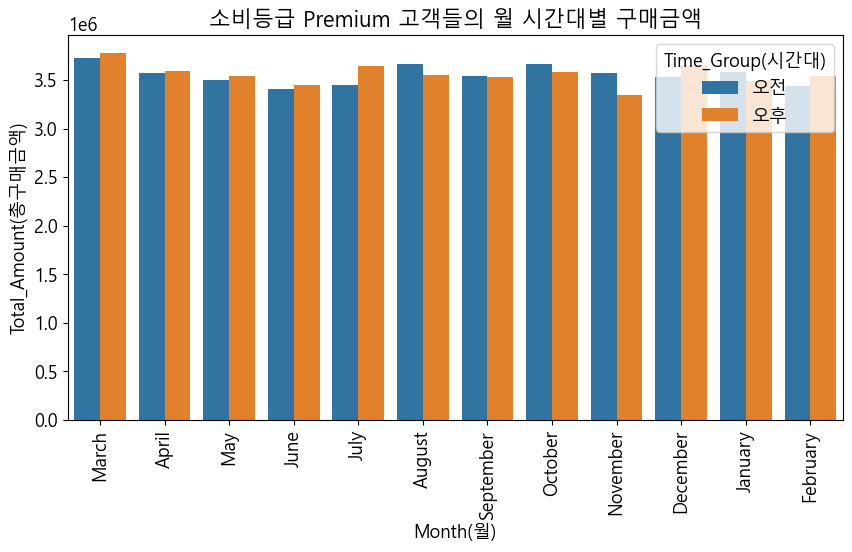

In [61]:
# 월별, 시간대별 매출 비교
month_time_sales(df_origin, 'Premium')

### 2. New 등급 고객들의 매출 분석

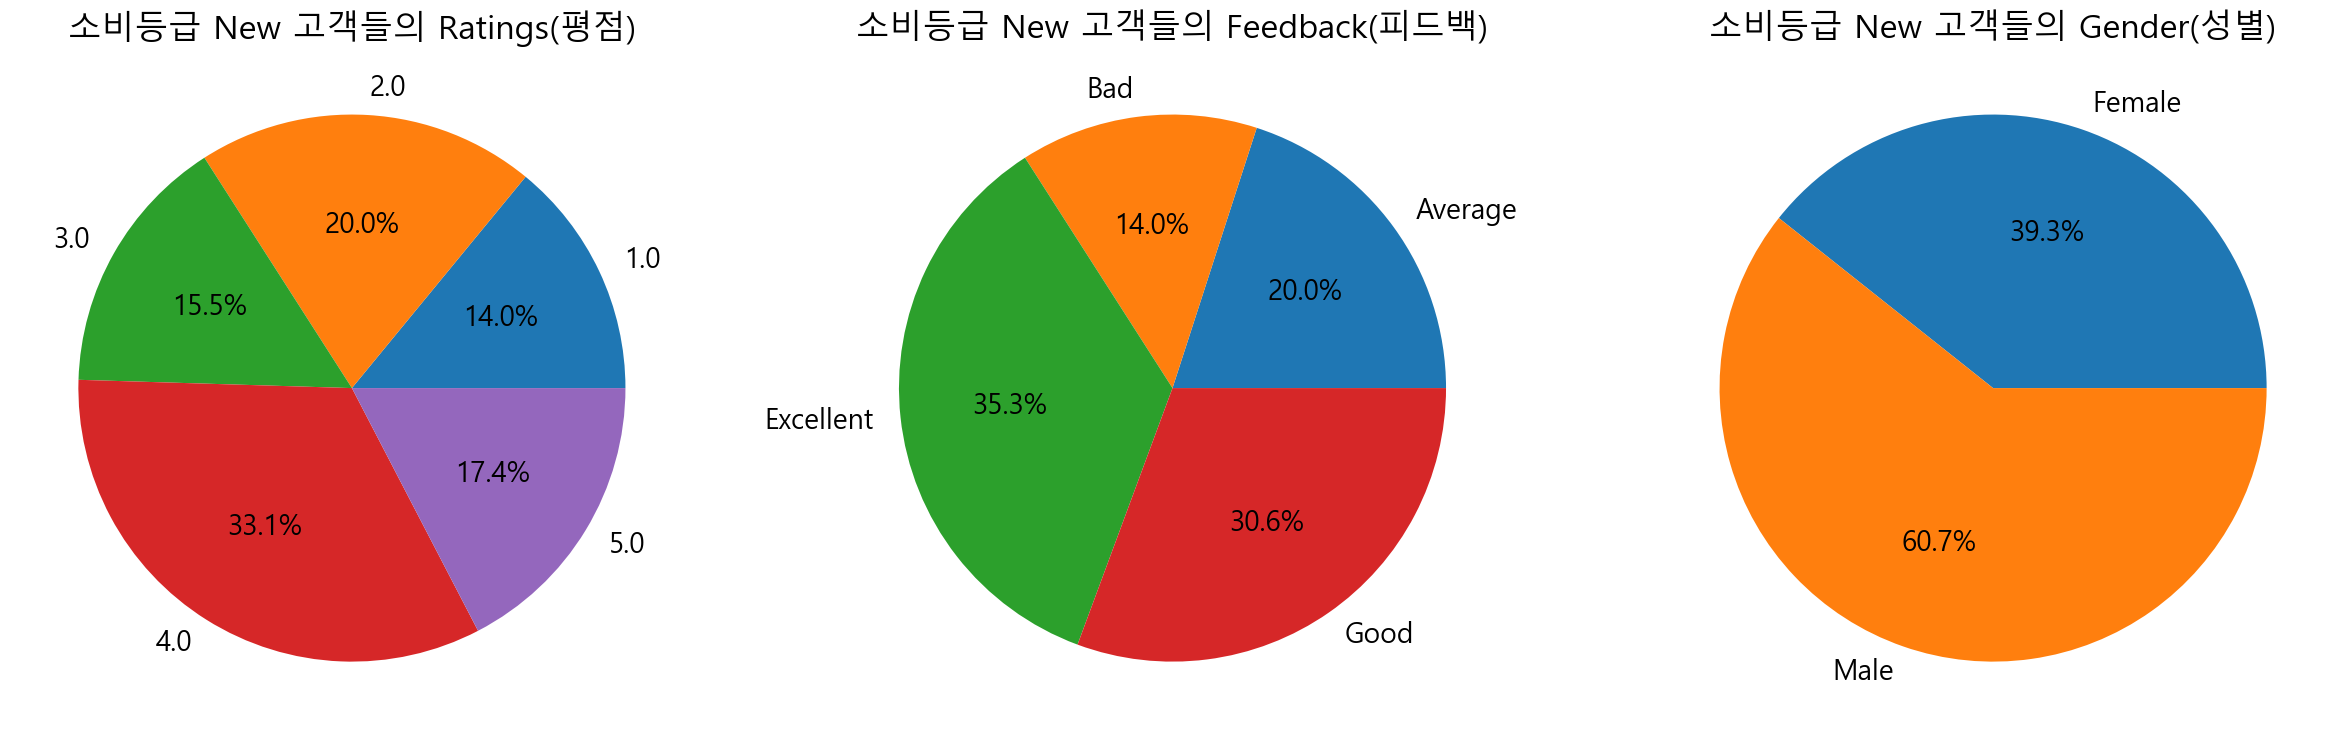

In [51]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 비율
ratings_feedback_gender(df_origin, 'New')

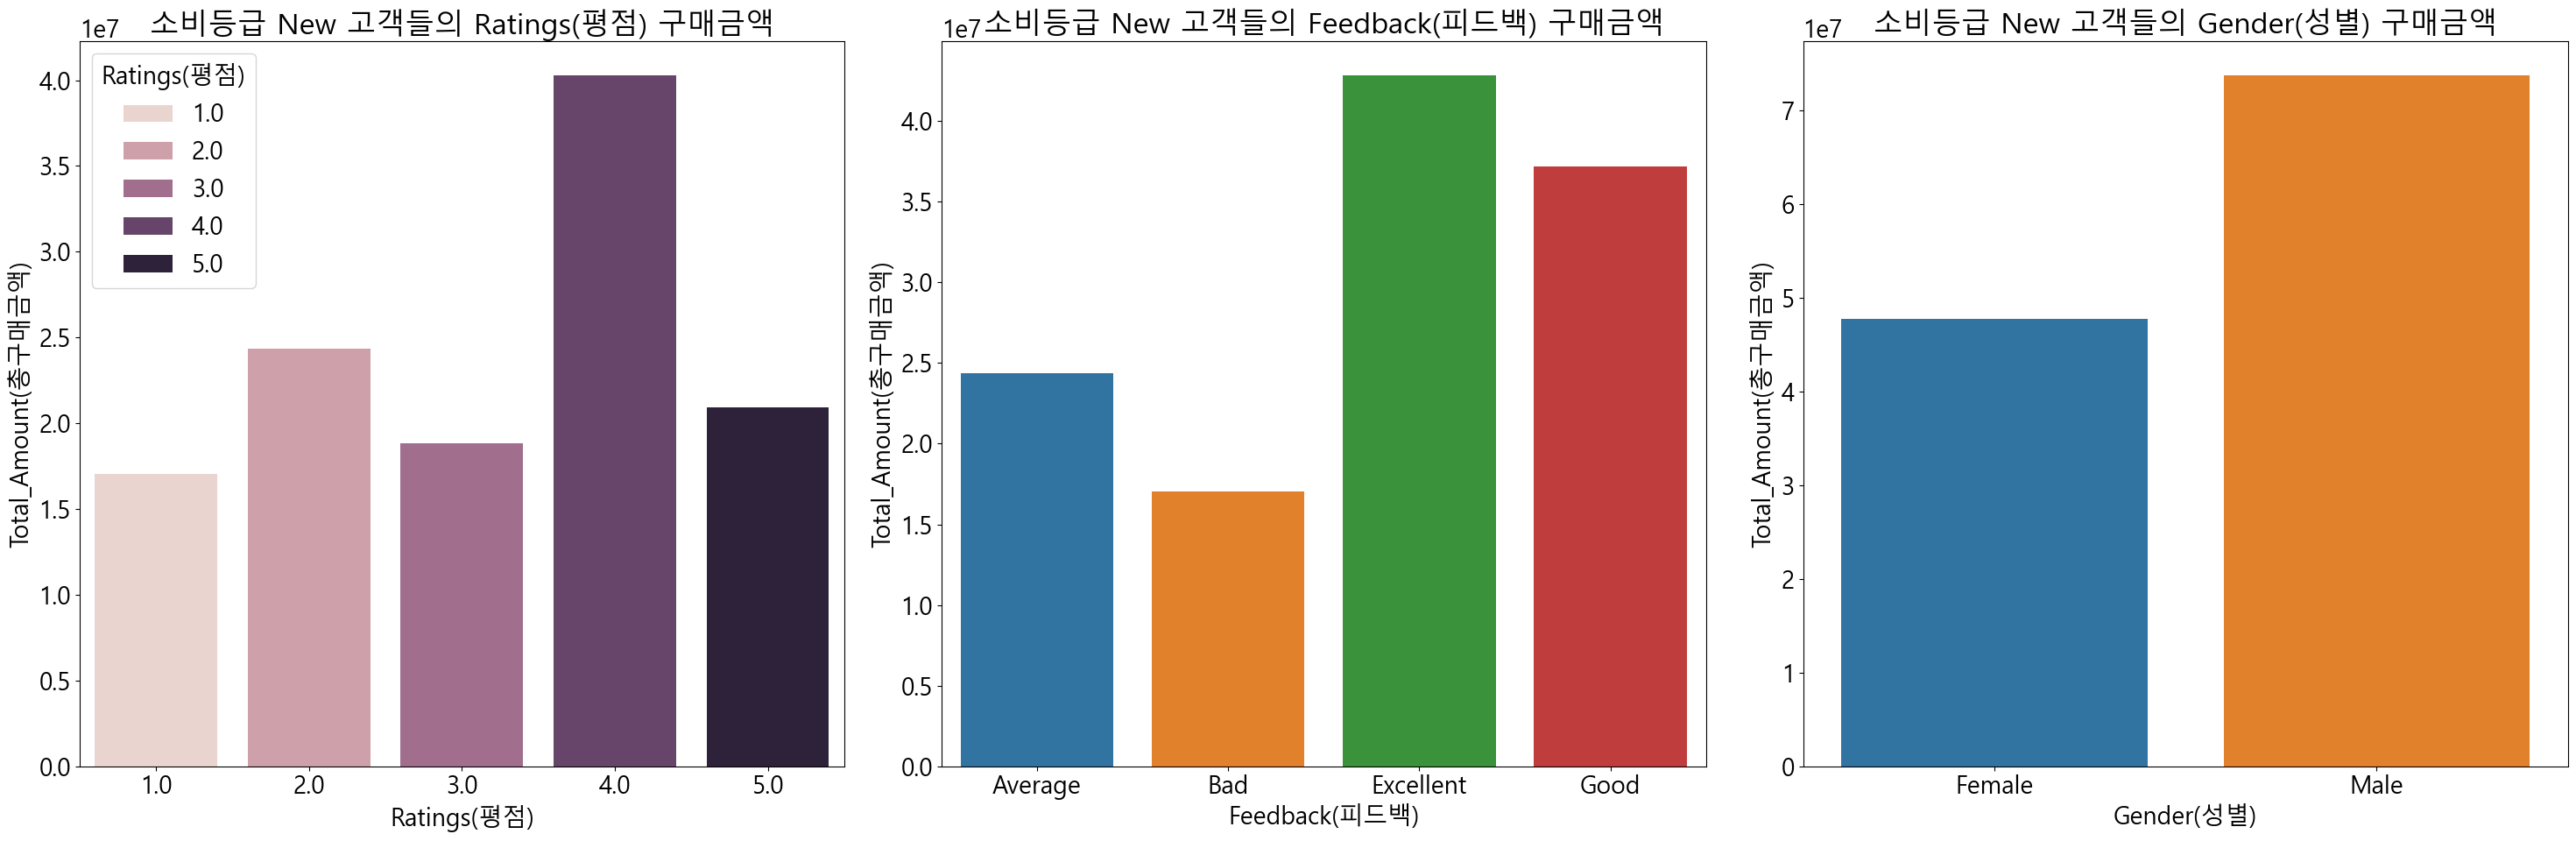

In [52]:
# 소비등급에 따른 고객들의 평점 / 피드백 / 성별 구매금액
ratings_feedback_gender_sales(df_origin, 'New')

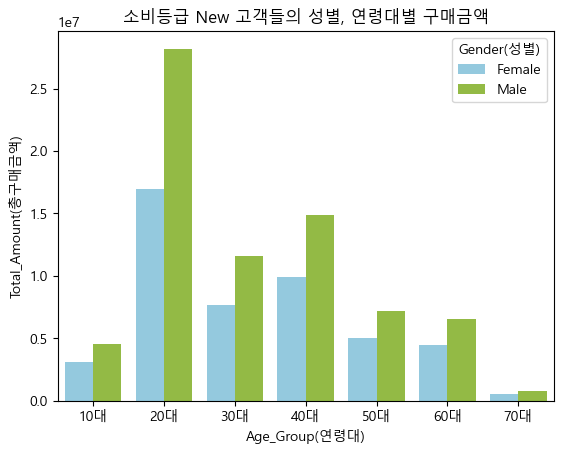

In [53]:
# 소비등급에 따른 고객들의 나이대별, 성별 총 구매금액
age_gender_sales(df_origin, 'New')

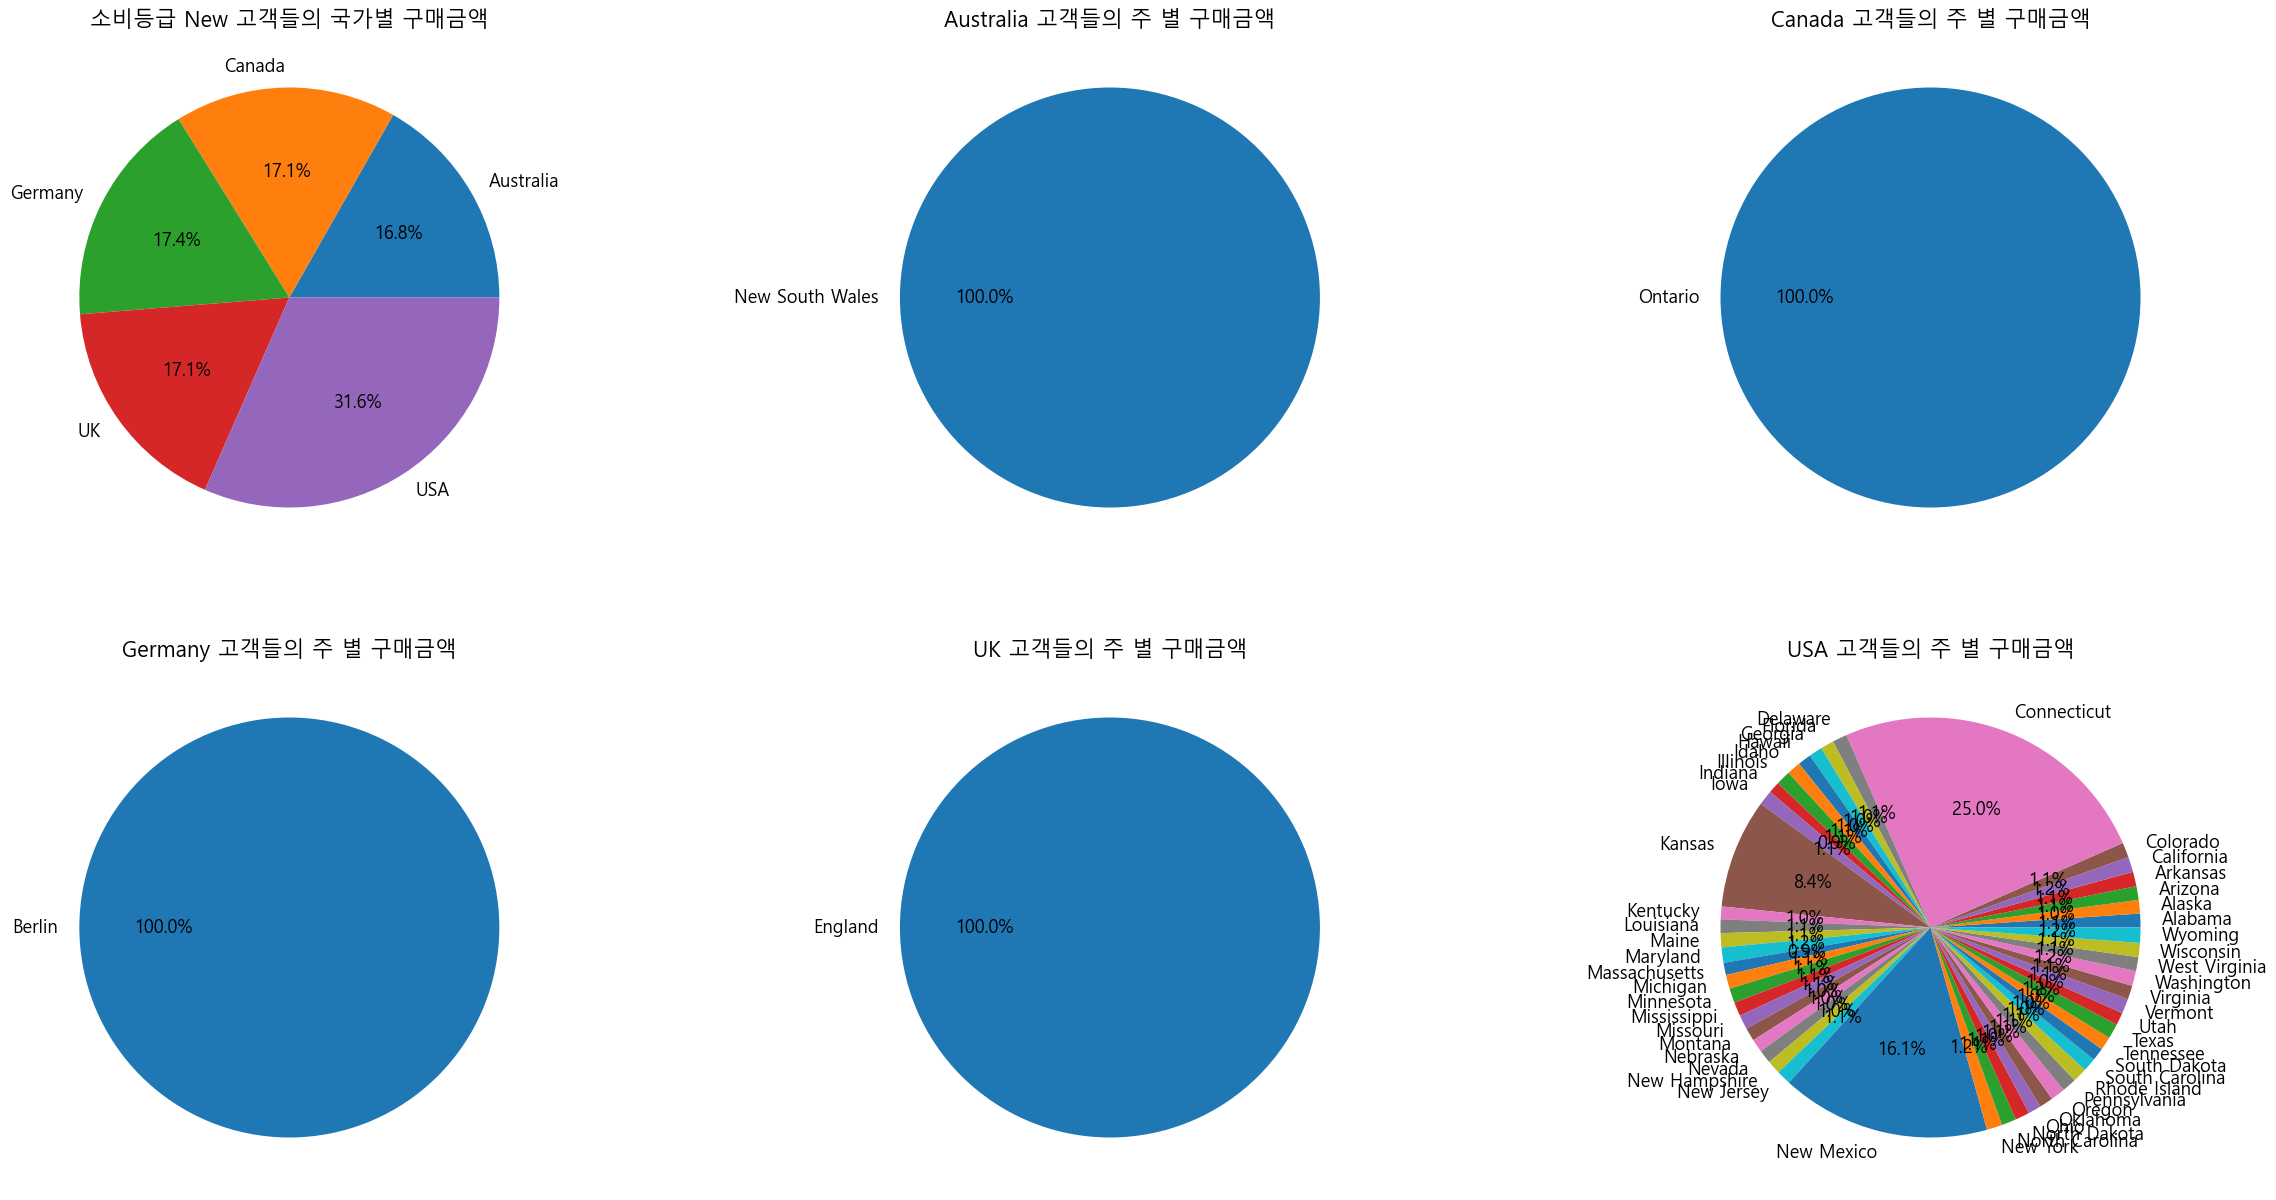

In [55]:
# 소비등급에 따른 사람들의 국가별, 주별 매출비교
country_state_sales(df_origin, 'New')

In [56]:
# 국가에 속한 주 별 고객 수
country_state_customer(df_origin, 'New', 'USA')

In [57]:
# 국가에 속한 주 별 고객들의 구매금액
country_state_customer_sales(df_origin, 'New', 'USA')

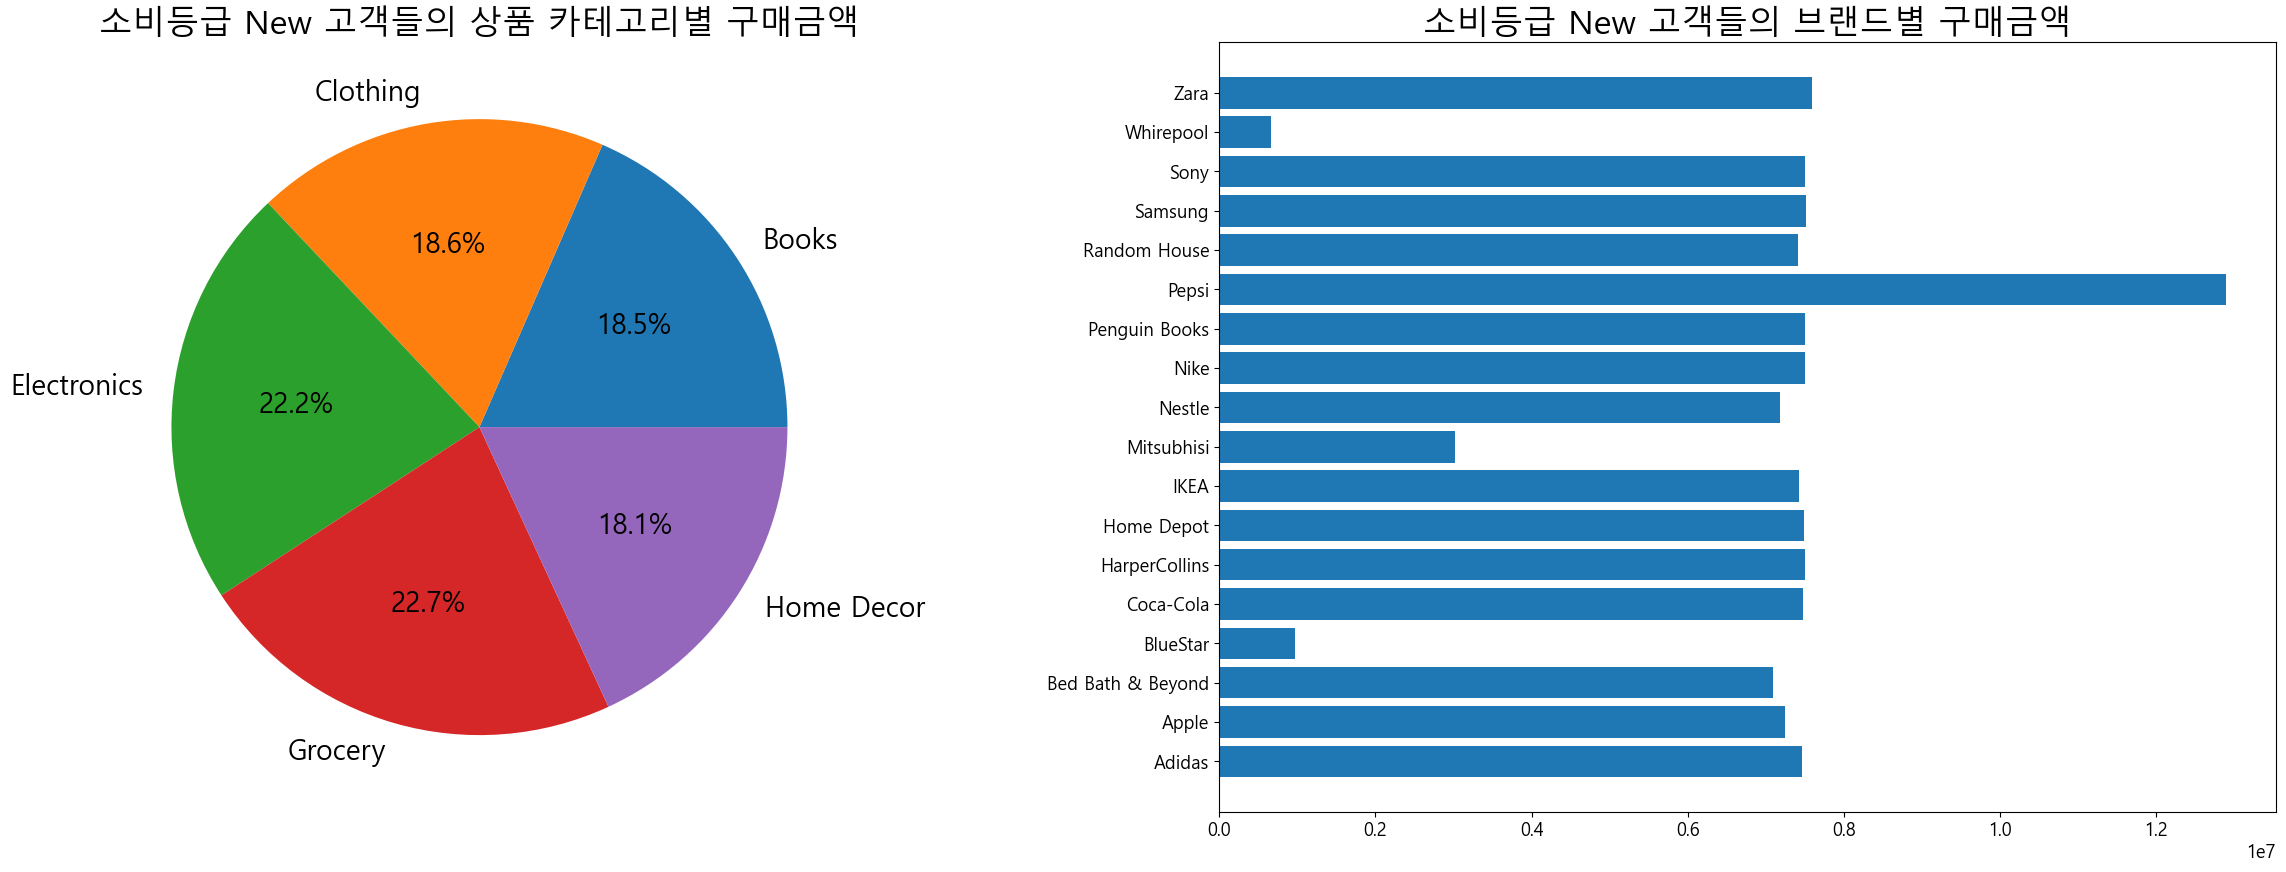

In [58]:
# 상품 카테고리별, 브랜드별 매출 비교
product_category_brand_sales(df_origin, 'New')

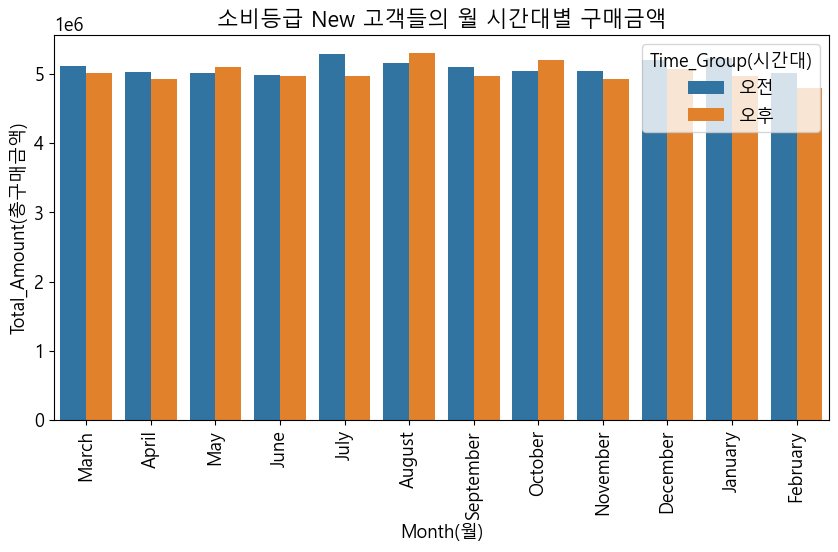

In [62]:
# 월별, 시간대별 매출 비교
month_time_sales(df_origin, 'New')